In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('eda_data.csv')

In [ ]:
# choose relevant columns
# get dummy data --> columns increase in dataframe if we're breaking down each category
# train test split

# multiple linear regression
# lasso regression
# random forest

# tune models using GridsearchCV 

# test ensembles


In [ ]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'job_state', 'job_city', 'same_state', 'age', 'python_yn', 'r_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'job_desc'],
      dtype='object')

In [ ]:
df_model = df[['avg_salary','Rating', 'Size','Type of ownership','Industry', 'Sector', 'Revenue','Competitors','hourly','employer_provided',
             'job_state','same_state','age','python_yn','spark','aws','excel','job_simp','seniority','job_desc']]

In [ ]:
df_dum = pd.get_dummies(df_model)

In [ ]:
df_dum.columns

Index(['avg_salary', 'Rating', 'Competitors', 'hourly', 'employer_provided',
       'same_state', 'age', 'python_yn', 'spark', 'aws',
       ...
       'job_state_WI', 'job_simp_analyst', 'job_simp_data engineer',
       'job_simp_data scientist', 'job_simp_director', 'job_simp_manager',
       'job_simp_mle', 'job_simp_na', 'seniority_na', 'seniority_senior'],
      dtype='object', length=114)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df_dum.drop('avg_salary',axis=1)

In [ ]:
y = df_dum.avg_salary.values

In [ ]:
y

array([ 93. ,  93. ,  93. ,  93. ,  93. ,  93. ,  93. ,  93. ,  93. ,
        93. ,  93. ,  93. ,  93. ,  93. ,  93. ,  93. ,  93. ,  93. ,
        93. ,  93. ,  93. ,  93. ,  93. ,  93. ,  93. ,  93. ,  93. ,
        93. ,  93. ,  93. , 106. , 106. , 106. , 106. , 106. , 106. ,
       106. , 106. , 106. , 106. , 106. , 106. , 106. , 106. , 106. ,
       106. , 106. , 106. , 106. , 106. , 106. , 106. , 106. , 106. ,
       106. , 106. , 106. , 106. , 106. , 106. ,  47.5,  47.5,  47.5,
        47.5,  47.5,  47.5,  47.5,  47.5,  47.5,  47.5,  47.5,  47.5,
        47.5,  47.5,  47.5,  47.5,  47.5,  47.5,  47.5,  47.5,  47.5,
        47.5,  47.5,  47.5,  47.5,  47.5,  47.5,  47.5,  47.5,  47.5,
        80. ,  80. ,  80. ,  80. ,  80. ,  80. ,  80. ,  80. ,  80. ,
        80. ])

In [ ]:
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
!pip install statsmodels

In [ ]:
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
X_sm = X = sm.add_constant(X)
# Column of 1 creates intercept. Creates constant in the model. 

In [ ]:
model = sm.OLS(y,X_sm)

In [ ]:
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     1.149
Date:                Wed, 01 Jul 2020   Prob (F-statistic):              0.428
Time:                        21:25:12   Log-Likelihood:                -342.80
No. Observations:                 100   AIC:                             863.6
Df Residuals:                      11   BIC:                             1095.
Df Model:                          88                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                37.2913     20.654      1.806      0.098      -8.168      82.750
Rating                                                5.7815      6.003      0.963      0.356      -7.431      18.994
Competitors                                           6.4877      6.926      0.937      0.369      -8.756      21.731
hourly                                             4.709e-13   4.92e-13      0.957      0.359   -6.12e-13    1.55e-12
employer_provided                                 -1.848e-12   2.39e-12     -0.774      0.455    -7.1e-12     3.4e-12
same_state                                           11.8778     12.823      0.926      0.374     -16.346      40.101
age                                                   0.0893      0.199      0.449      0.662      -0.349       0.527
python_yn                                            -2.5152     11.213     -0.224      0.827     -27.194      22.164
spark                                                15.0577     14.248      1.057      0.313     -16.302      46.417
aws                                                 -14.2271     15.012     -0.948      0.364     -47.268      18.814
excel                                                 2.8866     24.356      0.119      0.908     -50.720      56.493
job_desc                                              0.0025      0.006      0.414      0.687      -0.011       0.016
Size_-1                                               5.4627      9.297      0.588      0.569     -15.000      25.925
Size_1 to 50 employees                               15.4950     25.424      0.609      0.555     -40.463      71.453
Size_10000+ employees                                72.3481     50.258      1.440      0.178     -38.270     182.966
Size_1001 to 5000 employees                         -19.3613     26.679     -0.726      0.483     -78.082      39.360
Size_201 to 500 employees                            21.0302     27.853      0.755      0.466     -40.274      82.334
Size_5001 to 10000 employees                        -56.9758     48.835     -1.167      0.268    -164.460      50.509
Size_501 to 1000 employees                           -6.5181     26.408     -0.247      0.810     -64.642      51.606
Size_51 to 200 employees                              5.8105     17.445      0.333      0.745     -32.586      44.207
Type of ownership_-1                                  5.4627      9.297      0.588      0.569     -15.000      25.925
Type of ownership_Company - Private                 -14.8288     14.477     -1.024      0.328     -46.693      17.035
Type of ownership_Company - Public                  -61.3501     29.804     -2.058      0.064    -126.948       4.247
Type of ownersh

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [ ]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
from sklearn.model_selection import cross_val_score
# pull out sample data and a validation set. Run the model on sample and eval on val set.
# How far from avg are we using neg mean abs error
cross_val_score(lm, X_train,y_train,scoring = 'neg_mean_absolute_error',cv =3)

array([-29.03728435, -60.48022277, -38.64979397])

In [ ]:
X_sm

,const,Rating,Competitors,hourly,employer_provided,same_state,age,python_yn,spark,aws,excel,job_desc,Size_-1,Size_1 to 50 employees,Size_10000+ employees,Size_1001 to 5000 employees,Size_201 to 500 employees,Size_5001 to 10000 employees,Size_501 to 1000 employees,Size_51 to 200 employees,Type of ownership_-1,Type of ownership_Company - Private,Type of ownership_Company - Public,Type of ownership_Government,Type of ownership_Nonprofit Organization,Type of ownership_Private Practice / Firm,Type of ownership_Subsidiary or Business Segment,Industry_-1,Industry_Advertising & Marketing,Industry_Aerospace & Defense,Industry_Architectural & Engineering Services,Industry_Banks & Credit Unions,Industry_Biotech & Pharmaceuticals,Industry_Chemical Manufacturing,Industry_Computer Hardware & Software,Industry_Consulting,Industry_Consumer Electronics & Appliances Stores,Industry_Consumer Products Manufacturing,Industry_Electrical & Electronic Manufacturing,Industry_Enterprise Software & Network Solutions,...,Revenue_$500 million to $1 billion (USD),Revenue_-1,Revenue_Less than $1 million (USD),Revenue_Unknown / Non-Applicable,job_state_AZ,job_state_CA,job_state_DC,job_state_DE,job_state_FL,job_state_GA,job_state_IL,job_state_IN,job_state_KS,job_state_MA,job_state_MD,job_state_MO,job_state_NC,job_state_NE,job_state_NH,job_state_NY,job_state_OH,job_state_OR,job_state_PA,job_state_RI,job_state_SC,job_state_TN,job_state_TX,job_state_UT,job_state_VA,job_state_WA,job_state_WI,job_simp_analyst,job_simp_data engineer,job_simp_data scientist,job_simp_director,job_simp_manager,job_simp_mle,job_simp_na,seniority_na,seniority_senior
0,1.0,4.2,0,0,0,0,52,0,0,0,0,4076,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,1.0,2.9,3,0,0,1,22,1,0,0,0,2728,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,1.0,3.4,0,0,0,0,34,1,0,1,0,4794,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,1.0,3.1,3,0,0,1,27,0,0,1,0,3389,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,1.0,3.6,0,0,0,1,6,1,0,0,0,3482,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.0,3.7,0,0,0,1,19,0,1,0,0,5355,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
96,1.0,4.8,3,0,0,1,5,1,0,0,0,3826,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
97,1.0,4.4,3,0,0,1,37,0,0,0,0,474,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
98,1.0,3.7,2,0,0,0,7,1,0,0,0,3182,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [ ]:
np.mean(cross_val_score(lm, X_train,y_train,scoring = 'neg_mean_absolute_error',cv =3))

-42.722433695773105

In [ ]:
# Multi linear reg to get good values from sparse data is difficult
# Use normalization. Using lasso. Increase alpha smoothens data


In [ ]:
from sklearn.linear_model import Lasso
lm_l = Lasso()

In [ ]:
np.mean(cross_val_score(lm_l, X_train,y_train,scoring = 'neg_mean_absolute_error',cv =3))

-22.171040014525175

In [ ]:
alpha = []
error = []

In [ ]:
for i in range(1,100):
  alpha.append(i/100)
  lml = Lasso(alpha=(i/100))
  error.append(np.mean(cross_val_score(lml,X_train,y_train,scoring = 'neg_mean_absolute_error',cv =3)))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 392.2999839072625, tolerance: 3.1099188679245287
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 750.6108361492783, tolerance: 2.8532301886792455
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 623.9032428565464, tolerance: 2.9638375000000003
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 762.88530

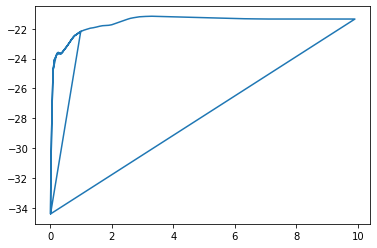

In [ ]:
plt.plot(alpha,error)

In [ ]:
err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err,columns=['alpha','error'])

In [ ]:
df_err[df_err.error == max(df_err.error)]

,alpha,error
32,3.3,-21.15489


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor()

In [ ]:
cross_val_score(rf,X_train,y_train,scoring = 'neg_mean_absolute_error',cv=3)

array([-21.03833333, -21.25981481, -20.5275    ])

In [ ]:
# provide parameters and runs models to give the best result
from sklearn.model_selection import GridSearchCV
parameters =  {'n_estimators': range(10,300,10), 'criterion': ('mse','mae'), 'max_features':('auto','sqrt','log2')}

In [ ]:
gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv = 3)

In [ ]:
gs.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [ ]:
gs.best_score_

-19.89207818930041

In [ ]:
gs.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=None, max_features='log2', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
tpred_lm = lm.predict(X_test)
tpred_lml = lm_l.predict(X_test)

In [ ]:
lm_l= Lasso(alpha=3.3)

In [ ]:
lm_l.fit(X_train,y_train)

Lasso(alpha=3.3, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
tpred_rf = gs.best_estimator_.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
mean_absolute_error(y_test,tpred_lml)

21.616921468227826

In [ ]:
mean_absolute_error(y_test,tpred_rf)


20.485833333333332

In [ ]:
mean_absolute_error(y_test,tpred_lm)


120.91265591330247

In [ ]:
mean_absolute_error(y_test,(tpred_lml+tpred_rf)/2)

21.051377400780584